<a href="https://colab.research.google.com/github/vanviethieuanh/CS114.L21/blob/main/Recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CS114.L21 - MÁY HỌC - MACHINE LEARNING**

**BÀI TẬP COLAB SỐ 01 (12/04/2021)**

**1.   YÊU CẦU**
+ Yêu cầu code: tạo một notebook colab với các đoạn code và chú thích cần thiết để thực hiện công việc sau:
  - Train model cho bài toán hand-written digits recognition theo example của sklearn: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
  - Truy cập webcam của máy tính từ colab.
  - Chụp ảnh một tờ giấy đang được giơ ra trước webcam.
  - Nhận dạng xem chữ số đang viết trên tờ giấy là số mấy.
+ Yêu cầu phân tích: Thông qua thực nghiệm chạy thử nhiều lần trả lời các câu hỏi sau:
  - Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
  - Nhìn vào đâu để kết luận là tốt hay không?
  - Nếu không tốt thì lý do tại sao?
  - Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

**2.   NHÓM THỰC HIỆN**
+ Nguyễn Đại Kỳ - 19521731 - 19521731@gm.uit.edu.vn
+ Văn Viết Hiếu Anh - 19521225 - 19521225@gm.uit.edu.vn
+ Lê Văn Phước - 19522054 - 19522054@gm.uit.edu.vn

**3.   LINK GITHUB** 
+ Link Github nhóm: https://github.com/vanviethieuanh/CS114.L21
+ Link Github bài làm: https://github.com/vanviethieuanh/CS114.L21/blob/main/Recognizing_hand_written_digits.ipynb

**4.   SOURCE CODE**

4.1. Nguồn tham khảo
+ Dataset, training: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
4.2. Code
+ 4.2.1. Thêm thư viện, kiểm tra và tiền xử lý dữ liệu



In [1]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


+ 4.2.2. Lấy dự liệu từ thư viện sklearn

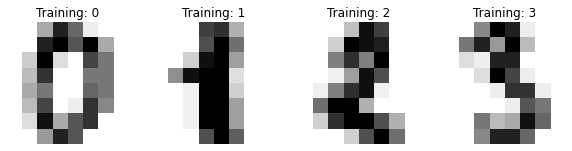

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

+ 4.2.3. Train dữ liệu và đưa ra dự đoán dựa trên bộ test

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

+ 4.2.4. Show dự đoán cùng với dự liệu test

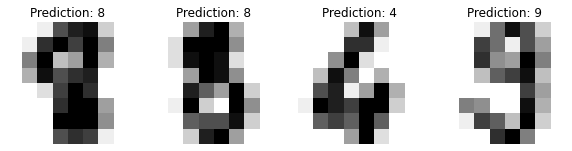

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

+ 4.2.5. Báo cáo phân loại

In [5]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

+ 4.2.6. Show confusion matrix

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


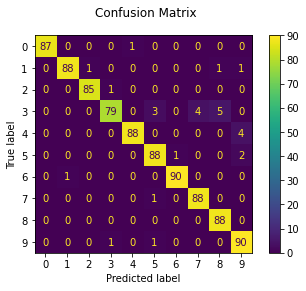

In [6]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

+ 4.2.7. Lấy dữ liệu từ webcame

In [8]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

+ 4.2.8. Chụp ảnh và lưu dữ liệu vào folder

<IPython.core.display.Javascript object>

Saved to number_0.jpg


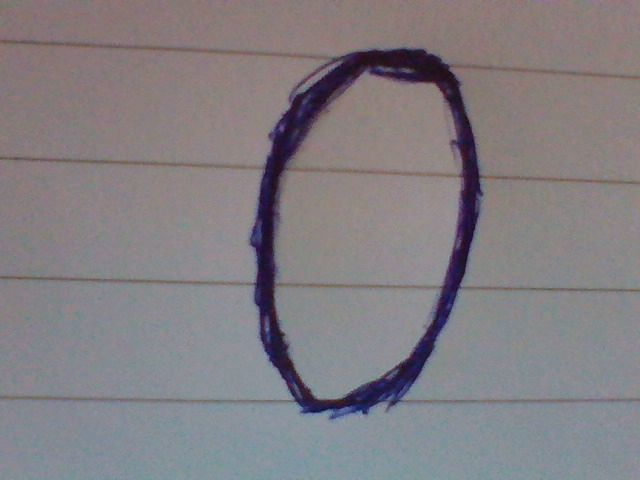

<IPython.core.display.Javascript object>

Saved to number_1.jpg


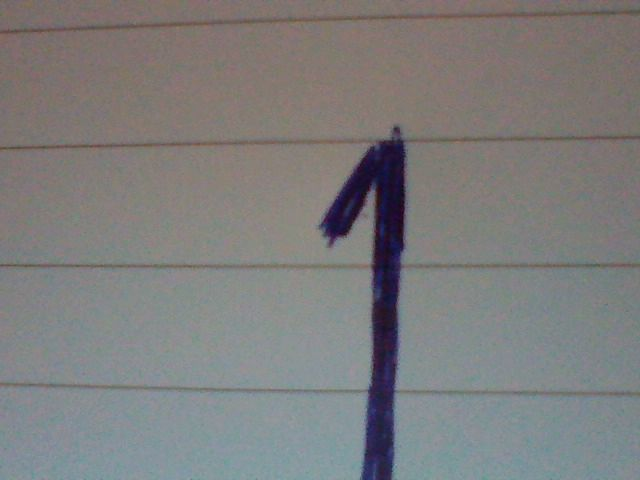

<IPython.core.display.Javascript object>

Saved to number_2.jpg


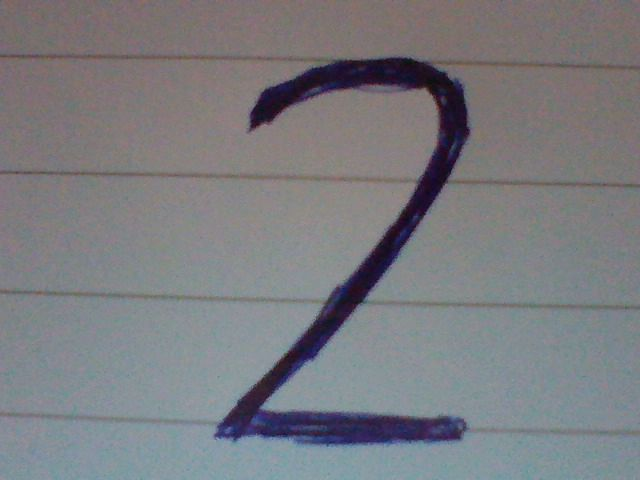

<IPython.core.display.Javascript object>

Saved to number_3.jpg


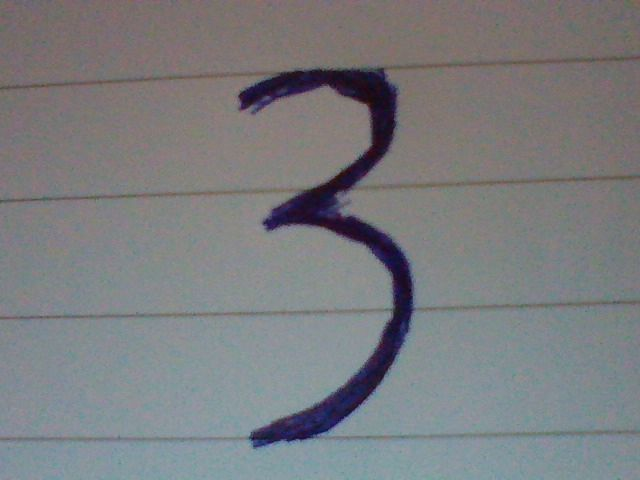

<IPython.core.display.Javascript object>

Saved to number_4.jpg


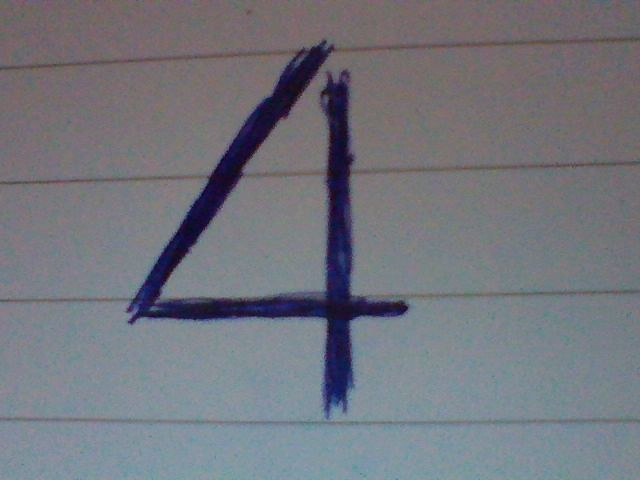

<IPython.core.display.Javascript object>

Saved to number_5.jpg


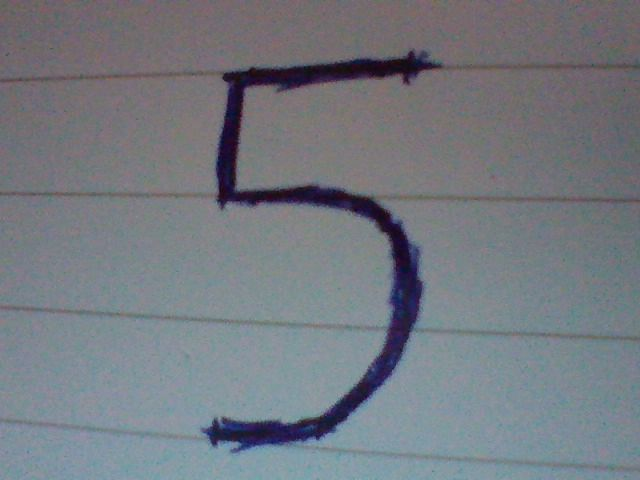

<IPython.core.display.Javascript object>

Saved to number_6.jpg


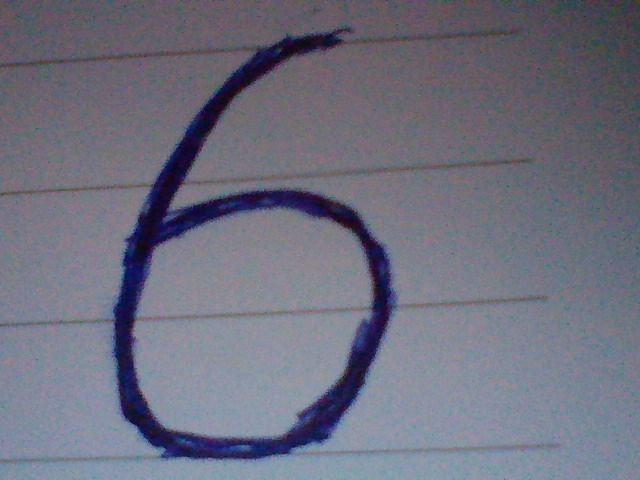

<IPython.core.display.Javascript object>

Saved to number_7.jpg


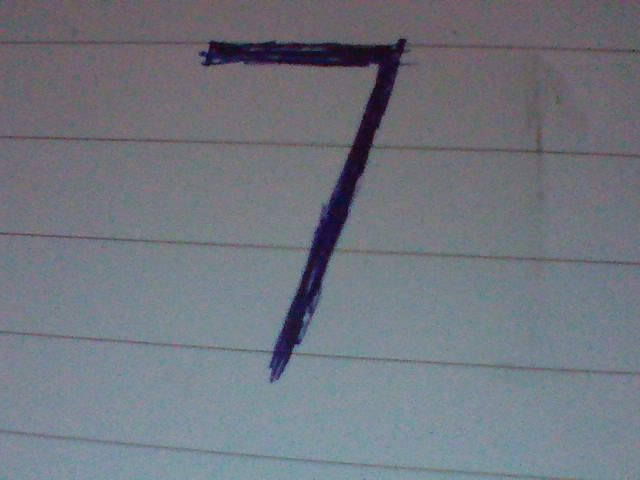

<IPython.core.display.Javascript object>

Saved to number_8.jpg


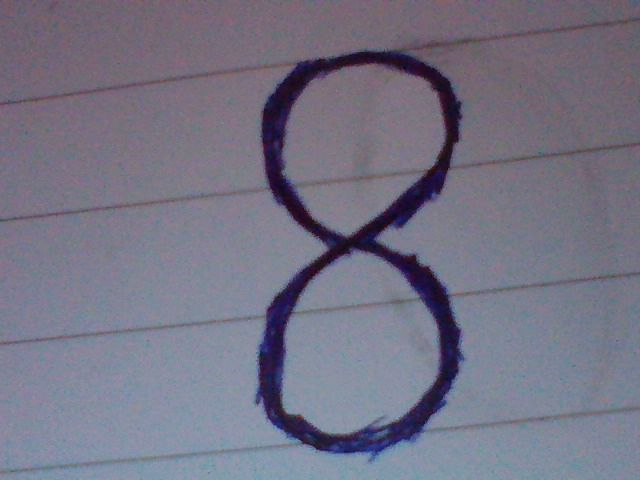

<IPython.core.display.Javascript object>

Saved to number_9.jpg


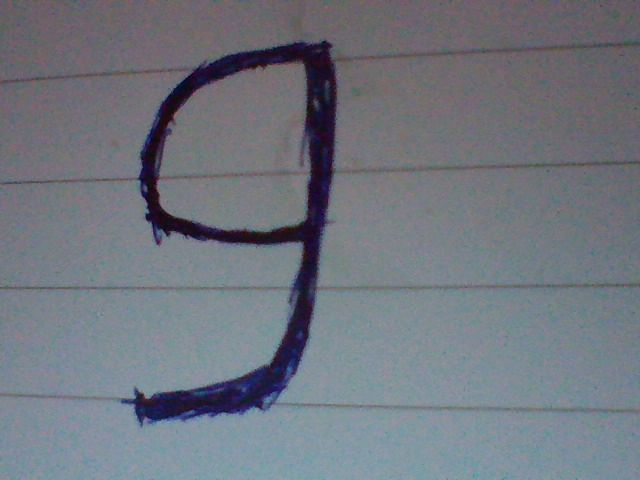

In [9]:
from IPython.display import Image
i = 0
while i < 10:
  try:
    img_number = "number_{}.jpg".format(i)
    filename = take_photo(filename=img_number)
    print('Saved to {}'.format(filename))
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))
  i += 1

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

+ 4.2.9. Xử lý dữ liệu và dự đoán kết quả

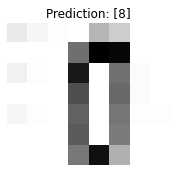

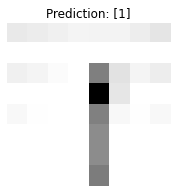

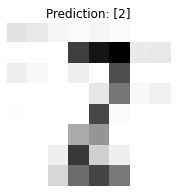

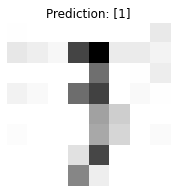

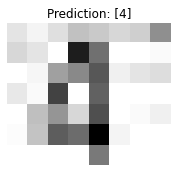

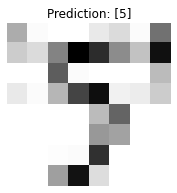

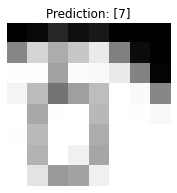

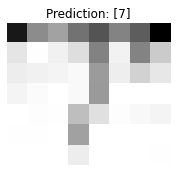

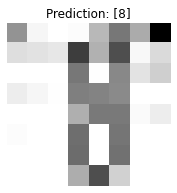

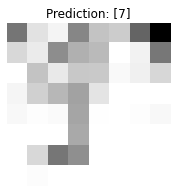

In [27]:
probability = 0
for i in range(10):
  name = 'number_{}.jpg'.format(i)
  image = cv2.imread(name)
  # Chuyển sang ảnh xám
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  # Chuyển sang ảnh nhị phân
  ret, thresh_binary = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
  ret, thresh_binary = cv2.threshold(thresh_binary, 170, 255, cv2.THRESH_BINARY_INV)
  # Resize lại kích cỡ (8x8)
  resize1 = cv2.resize(thresh_binary, (8, 8), interpolation = cv2.INTER_AREA) 
  norm_image = cv2.normalize(resize1, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  result = norm_image.reshape(-1, 64)
  # Dự đoán kết quả
  predicted = clf.predict(result)
  # Tính tống probability
  probability += (predicted == i)
  _, ax = plt.subplots(figsize=(4, 3))
  ax.set_axis_off()
  image = resize1
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title(f'Prediction: {predicted}')


+ 4.2.10. Tính accuracy khi test ảnh thực tế với webcame từ laptop

In [28]:
print("accuracy: {0}\n".format(probability / 11))

accuracy: [0.54545455]



**5. Kết luận: Bài tập colab số 01. sklearn hand-written digits recognition**
1. Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
+ Mô hình khi chạy với ảnh chụp thực tế với webcam từ laptop và giấy viết tay cho kết quả không tốt với accuracy: [0.54545455]

+ Nhóm em nghĩ model thì có lẽ tốt còn do kết quả có tệ vì do tiền xử lý ảnh và chất lượng ảnh khi chụp có vấn đề dẫn đến kết quả không được tốt như mong muốn.
2. Nhìn vào đâu để kết luận là tốt hay không?

+ Nhìn vào label của ảnh và sự dự doán khi đưa ảnh với model để test, nếu label bằng với predicted thì ta kết luận là tốt và ngược lại thì không tốt.

+ Một số kết quả tốt khi thử test với webcam laptop:

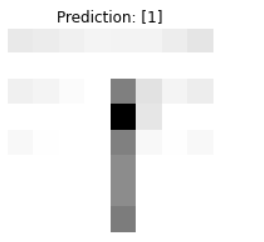

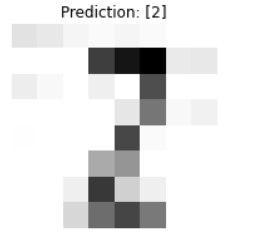

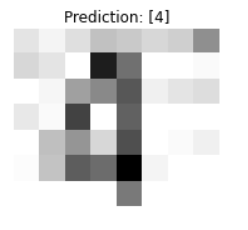

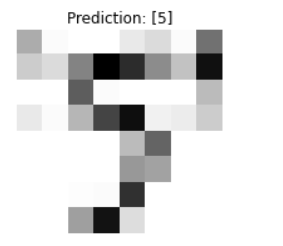

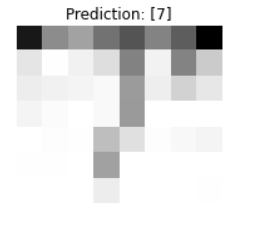

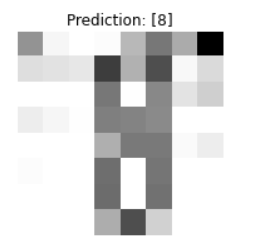


3. Nếu không tốt thì lý do tại sao?
+ Do chất lượng ảnh khi chụp bằng webcam của laptop.
+ Do quá trình xử lý tiền dữ liệu cũng như chọn số pixel để cắt ảnh.
+ Do sự thiết kiến thức trong quá trình xử lý ảnh.

+ Một số kết quả không tốt như hình bên dưới:

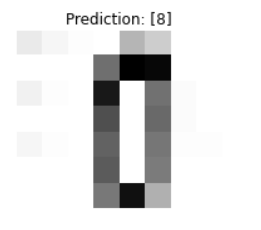

Đây là số 0 như khi dự đoán lại ra số 8

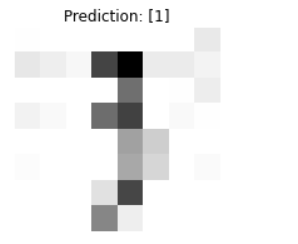

Đây là số 3 như dự đoán lại ra số 1

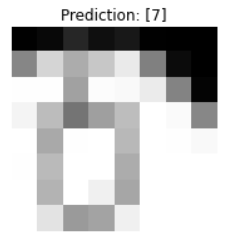

Đây là số 6 như dự đoán ra số 7

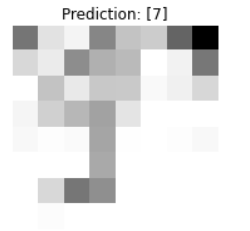

Đây là số 9 nhưng dự đoán ra số 7


4. Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
+ Nếu thực sự tốt, thì model này vẫn khó để giải quyết bài toán phức tạp như nhận dạng biển số nhà. Vì biển số nhà không chỉ là số mà còn một số ký tự khác nữa và hiện nay có một số phương pháp train model như mạng Neural NetWork và Deep Learning có thể cho kết quả tốt hơn Machine Learning như hiện nay. Theo tìm hiểu của nhóm em, nếu model được huấn luyện bằng mạng NN (CNN) thì nó sẽ thể hiện tốt hơn nhiều hơn model train bằng Machine Learning, cũng như không cần các phương pháp biến đổi phức tạp và cho hiệu xuất cao hơn.
+ Ngoài ra thì cần phải xử lý bước đầu vào là phải cắt ảnh thành từng chữ mới có thể train được nên khá phức tạp


